<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep29-30/MCMC_Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Markov Chain Metropolis algorithm**

1.- Define an initial value of the free parameters.

2.- Draw a new random sample of the free parameters from a gaussian distribution centered at the initial values, and with
a predefined dispersion.

3.- Evaluate the (logarithm) posterior of the initial parameters and that of the proposed parameters and compare them.
- if the (logarithm) posterior of the proposal is higher than the (logarithm) posterior of the initial parameters accept
the proposal and save it.
- if the (logarithm) posterior of the proposal is lower than the (logarithm) posterior of the initial parameters then
generate a random number between cero and one, if the ratio of the (logarithm) posterior of the proposal and the
initial parameter is larger than such number then you accept the proposal and save it, if not you discard the
proposal and keep the initial value.

4.- If the proposal was accepted, replace the initial value by such proposal, if not keep the initial sample and repeat step

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

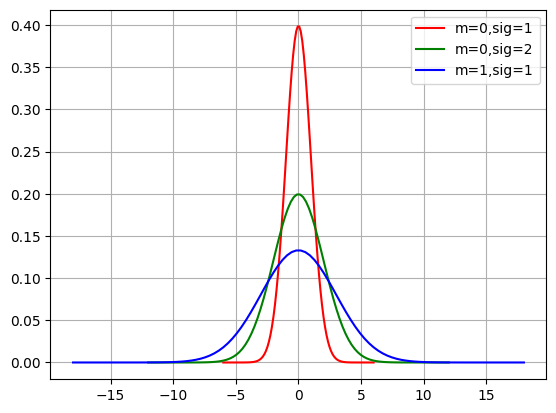

In [ ]:
theta_ini = []

def normal_distribution(x, mean, sigma):
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi)*sigma)

mean1, sigma1 = 0, 1
x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 100)

mean2, sigma2 = 0, 2
x2 = np.linspace(mean2 - 6*sigma2, mean2 + 6*sigma2, 100)

mean3, sigma3 = 0, 3
x3 = np.linspace(mean3 - 6*sigma3, mean3 + 6*sigma3, 100)

y1 = normal_distribution(x1, mean1, sigma1)
y2 = normal_distribution(x2, mean2, sigma2)
y3 = normal_distribution(x3, mean3, sigma3)

plt.plot(x1, y1, 'r', label='m=0,sig=1')
plt.plot(x2, y2, 'g', label='m=0,sig=2')
plt.plot(x3, y3, 'b', label='m=1,sig=1')
plt.legend()
plt.grid()
plt.show()

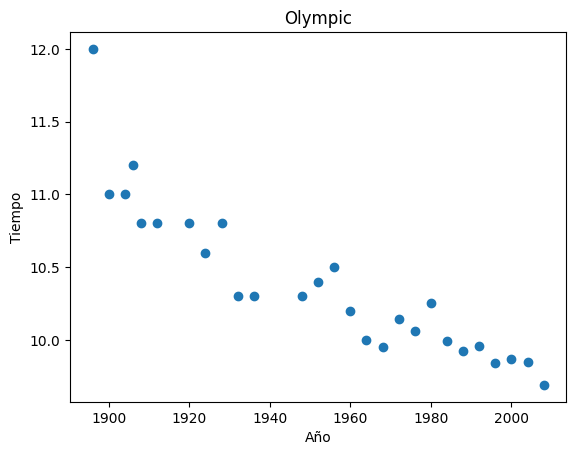

In [ ]:
# Datos proporcionados
data=np.loadtxt("olympic100m_men.txt",delimiter=',').T

x = data[0]
y = data[1]

plt.title('Olympic')
plt.xlabel('Año')
plt.ylabel('Tiempo')
plt.scatter(x,y)

In [53]:
def log_likelihood(params, data):
    mean, std_dev = params
    return -0.5 * np.sum(np.log(2 * np.pi * std_dev**2) + ((data[:, 1] - mean) / std_dev)**2)

def log_prior(params):
    # En este ejemplo, asumimos una distribución uniforme para los parámetros.
    return 0  # Todos los parámetros tienen la misma probabilidad a priori.

def log_posterior(params, data):
    return log_likelihood(params, data) + log_prior(params)

def metropolis_hastings(initial_params, num_samples, proposal_std):
    samples = [initial_params]
    current_params = initial_params

    for _ in range(num_samples):
        proposal_params = np.random.normal(current_params, proposal_std)
        log_posterior_current = log_posterior(current_params, data)
        log_posterior_proposal = log_posterior(proposal_params, data)

        if log_posterior_proposal > log_posterior_current:
            current_params = proposal_params
        else:
            acceptance_ratio = np.exp(log_posterior_proposal - log_posterior_current)
            if np.random.rand() < acceptance_ratio:
                current_params = proposal_params

        samples.append(current_params)

    return np.array(samples)

initial_values = [0, 1]  # Valores iniciales arbitrarios
num_samples = 10000
proposal_std = 0.1

samples = metropolis_hastings(initial_values, num_samples, proposal_std)

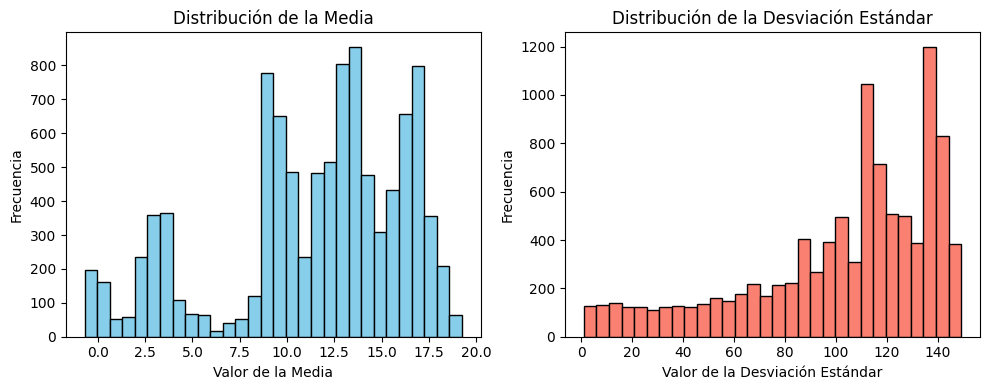

In [54]:
# Obtener las muestras de la media y desviación estándar
mean_samples = samples[:, 0]
std_dev_samples = samples[:, 1]

# Visualizar la distribución de la media
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(mean_samples, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Media')
plt.xlabel('Valor de la Media')
plt.ylabel('Frecuencia')

# Visualizar la distribución de la desviación estándar
plt.subplot(1, 2, 2)
plt.hist(std_dev_samples, bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de la Desviación Estándar')
plt.xlabel('Valor de la Desviación Estándar')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

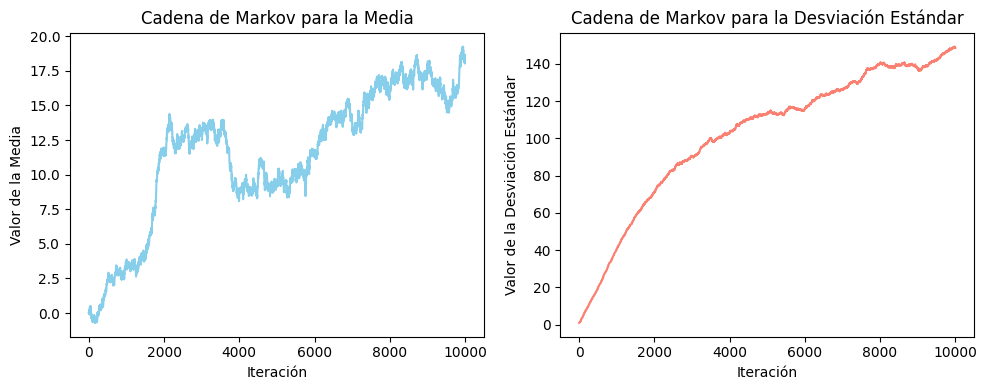

In [55]:
# Visualizar la cadena de Markov para la media
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mean_samples, color='skyblue')
plt.title('Cadena de Markov para la Media')
plt.xlabel('Iteración')
plt.ylabel('Valor de la Media')

# Visualizar la cadena de Markov para la desviación estándar
plt.subplot(1, 2, 2)
plt.plot(std_dev_samples, color='salmon')
plt.title('Cadena de Markov para la Desviación Estándar')
plt.xlabel('Iteración')
plt.ylabel('Valor de la Desviación Estándar')

plt.tight_layout()
plt.show()